## Lab 3: Cleaning and Analysis of Books Dataset


# Table of Contents 
<ol start="1">
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> Determining the Best Books  </li>
<li>Trends in Popularity of Genres </li>
</ol>


## Part 1: Loading and Cleaning with Pandas 
Read in the `goodreads.csv` file, examine the data, and do any necessary data cleaning. 

Here is a description of the columns (in order) present in this csv file:

```
rating: the average rating on a 1-5 scale achieved by the book
review_count: the number of Goodreads users who reviewed this book
isbn: the ISBN code for the book
booktype: an internal Goodreads identifier for the book
author_url: the Goodreads (relative) URL for the author of the book
year: the year the book was published
genre_urls: a string with '|' separated relative URLS of Goodreads genre pages
dir: a directory identifier internal to the scraping code
rating_count: the number of ratings for this book (this is different from the number of reviews)
name: the name of the book
```

Load the appropriate libraries

In [35]:
#write your solution here
import pandas as pd


### Cleaning: Reading in the data
We read in and clean the data from `goodreads.csv`.  Try directly loading the data from file and see what the dataframe look like. What's the problem with naively loading the data as is? You might want to open the CSV file in Excel or your favorite text editor to see how this dataset is formatted.

In [36]:
#Read the data into a dataframe
df = pd.read_csv('goodreads.csv')
df
#Inser your code


#Examine the first couple of rows of the dataframe
####### 
df.head(10)
#   Insert your code
####### 



4.40 136455  0439023483  good_reads:book  \
0  4.41  16648  0439358078  good_reads:book   
1  3.56  85746  0316015849  good_reads:book   
2  4.23  47906  0061120081  good_reads:book   
3  4.23  34772  0679783261  good_reads:book   
4  4.25  12363  0446675539  good_reads:book   
5  4.22   7205  0066238501  good_reads:book   
6  4.38  10902  0060256656  good_reads:book   
7  3.79  20670  0452284244  good_reads:book   
8  4.18  12302  0345391802  good_reads:book   
9  4.03  20937  0739326228  good_reads:book   

  https://www.goodreads.com/author/show/153394.Suzanne_Collins    2008  \
0  https://www.goodreads.com/author/show/1077326....            2003.0   
1  https://www.goodreads.com/author/show/941441.S...            2005.0   
2  https://www.goodreads.com/author/show/1825.Har...            1960.0   
3  https://www.goodreads.com/author/show/1265.Jan...            1813.0   
4  https://www.goodreads.com/author/show/11081.Ma...            1936.0   
5  https://www.goodreads.com/author/show/1069006....            1949.0   
6  https://www.goodreads.com/author/show/435477.S...            1964.0   
7  https://www.goodreads.com/author/show/3706.Geo...            1945.0   
8  https://www.goodreads.com/author/show/4.Dougla...            1979.0   
9  https://www.goodreads.com/author/show/614.Arth...            1997.0   

  /genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action  \
0  /genres/fantasy|/genres/young-adult|/genres/fi...                                                                                                                                                                                                      
1  /genres/young-adult|/genres/fantasy|/genres/ro...                                                                                                                                                                                                      
2  /genres/classics|/genres/fiction|/genres/histo...                                                                                                                                                                                                      
3  /genres/classics|/genres/fiction|/genres/roman...                                                                                                                                                                                                      
4  /genres/classics|/genres/historical-fiction|/g...                                                                                                                                                                                                      
5  /genres/classics|/genres/young-adult|/genres/c...                                                                                                                                                                                                      
6  /genres/childrens|/genres/young-adult|/genres/...                                                                                                                                                                                                      
7  /genres/classics|/genres/fiction|/genres/scien...                                                                                                                                                                                                      
8  /genres/science-fiction|/genres/humor|/genres/...                                                                                                                                                                                                      
9  /genres/fiction|/genres/historical-fiction|/ge...                                                                                                            

Lets read the csv file with custom column descriptions specified in the problem statement.

In [37]:
#Read the data into a dataframe specifying column names

df = pd.read_csv('goodreads.csv', names = ['rating','review_count','isbn','book','author_url','year','genre_urls','dir','rating_count','name'])


#Examine the first couple of rows of the dataframe
####### 
df.head(10)
#   Insert your code
####### 



rating review_count        isbn             book  \
0    4.40       136455  0439023483  good_reads:book   
1    4.41        16648  0439358078  good_reads:book   
2    3.56        85746  0316015849  good_reads:book   
3    4.23        47906  0061120081  good_reads:book   
4    4.23        34772  0679783261  good_reads:book   
5    4.25        12363  0446675539  good_reads:book   
6    4.22         7205  0066238501  good_reads:book   
7    4.38        10902  0060256656  good_reads:book   
8    3.79        20670  0452284244  good_reads:book   
9    4.18        12302  0345391802  good_reads:book   

                                          author_url    year  \
0  https://www.goodreads.com/author/show/153394.S...  2008.0   
1  https://www.goodreads.com/author/show/1077326....  2003.0   
2  https://www.goodreads.com/author/show/941441.S...  2005.0   
3  https://www.goodreads.com/author/show/1825.Har...  1960.0   
4  https://www.goodreads.com/author/show/1265.Jan...  1813.0   
5  https://www.goodreads.com/author/show/11081.Ma...  1936.0   
6  https://www.goodreads.com/author/show/1069006....  1949.0   
7  https://www.goodreads.com/author/show/435477.S...  1964.0   
8  https://www.goodreads.com/author/show/3706.Geo...  1945.0   
9  https://www.goodreads.com/author/show/4.Dougla...  1979.0   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   
5  /genres/classics|/genres/historical-fiction|/g...   
6  /genres/classics|/genres/young-adult|/genres/c...   
7  /genres/childrens|/genres/young-adult|/genres/...   
8  /genres/classics|/genres/fiction|/genres/scien...   
9  /genres/science-fiction|/genres/humor|/genres/...   

                                                 dir rating_count  \
0                dir01/2767052-the-hunger-games.html      2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...      1284478   
2                          dir01/41865.Twilight.html      2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html      2078123   
4                dir01/1885.Pride_and_Prejudice.html      1388992   
5                dir01/18405.Gone_with_the_Wind.html       645470   
6          dir01/11127.The_Chronicles_of_Narnia.html       286677   
7                  dir01/370493.The_Giving_Tree.html       502891   
8                        dir01/7613.Animal_Farm.html      1364879   
9  dir01/11.The_Hitchhiker_s_Guide_to_the_Galaxy....       724713   

                                                name  
0            The Hunger Games (The Hunger Games, #1)  
1  Harry Potter and the Order of the Phoenix (Har...  
2                            Twilight (Twilight, #1)  
3                              To Kill a Mockingbird  
4                                Pride and Prejudice  
5                                 Gone with the Wind  
6  The Chronicles of Narnia (Chronicles of Narnia...  
7                                    The Giving Tree  
8                                        Animal Farm  
9  The Hitchhiker's Guide to the Galaxy (Hitchhik...


### Cleaning: Examing the dataframe - quick checks

We should examine the dataframe to get a overall sense of the content.

In [38]:

#Start by check the column data types
####### 
#   Insert your code
df.dtypes
####### 


rating          float64
review_count     object
isbn             object
book             object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

There are a couple more quick sanity checks to perform on the dataframe. 

In [39]:


#Come up with a few other important properties of the dataframe to check
####### 
#   Insert your code
####### 
#we need to check for NaN values, empty strings...these kid of checks are kown as sanity checks.
df.isnull()

rating  review_count   isbn   book  author_url   year  genre_urls  \
0      False         False  False  False       False  False       False   
1      False         False  False  False       False  False       False   
2      False         False  False  False       False  False       False   
3      False         False  False  False       False  False       False   
4      False         False  False  False       False  False       False   
...      ...           ...    ...    ...         ...    ...         ...   
5995   False         False  False  False       False  False       False   
5996   False         False  False  False       False  False       False   
5997   False         False  False  False       False  False       False   
5998   False         False   True  False       False  False       False   
5999   False         False  False  False       False  False       False   

        dir  rating_count   name  
0     False         False  False  
1     False         False  False  
2     False         False  False  
3     False         False  False  
4     False         False  False  
...     ...           ...    ...  
5995  False         False  False  
5996  False         False  False  
5997  False         False  False  
5998  False         False  False  
5999  False         False  False  

[6000 rows x 10 columns]

**Question:** Was the data read correctly and values represented as we expected?

Answer : 

### Cleaning: Examining the dataframe - a deeper look

Beyond performing checking some quick general properties of the data frame and looking at the first $n$ rows, we can dig a bit deeper into the values being stored. If you haven't already, check to see if there are any missing values in the data frame.

In [40]:
#Get a sense of how many missing values there are in the dataframe.
####### 
#   Insert your code
####### 
df.isna().sum()


rating            2
review_count      0
isbn            475
book              0
author_url        0
year              7
genre_urls       62
dir               0
rating_count      0
name              0
dtype: int64

In [41]:
#Try to locate where the missing values occur
####### 
#   Insert your code
####### 
df.rating.isna().sum() 


2

In [42]:
df[df.rating.isna()] ## missing value for rating 



rating review_count  isbn  book author_url  year genre_urls  \
3643     NaN         None  None  None       None   NaN        NaN   
5282     NaN         None  None  None       None   NaN        NaN   

                                  dir rating_count  name  
3643  dir37/9658936-harry-potter.html         None  None  
5282     dir53/113138.The_Winner.html         None  None

In [43]:
df[df.isbn.isna()]

rating review_count isbn             book  \
16      3.92        38061  NaN  good_reads:book   
49      3.85        11628  NaN  good_reads:book   
85      4.16        14968  NaN  good_reads:book   
116     3.92         8393  NaN  good_reads:book   
156     4.03         3473  NaN  good_reads:book   
...      ...          ...  ...              ...   
5972    4.19         1670  NaN  good_reads:book   
5976    4.23         1185  NaN  good_reads:book   
5977    4.03          218  NaN  good_reads:book   
5991    4.20          650  NaN  good_reads:book   
5998    3.91          281  NaN  good_reads:book   

                                             author_url    year  \
16    https://www.goodreads.com/author/show/498072.A...  2003.0   
49    https://www.goodreads.com/author/show/5152.Vla...  1955.0   
85    https://www.goodreads.com/author/show/137902.R...  2007.0   
116   https://www.goodreads.com/author/show/957894.A...  1942.0   
156   https://www.goodreads.com/author/show/4785.Ale...  1843.0   
...                                                 ...     ...   
5972  https://www.goodreads.com/author/show/4586597....  2011.0   
5976  https://www.goodreads.com/author/show/5160667....  2014.0   
5977  https://www.goodreads.com/author/show/5769580....  1987.0   
5991    https://www.goodreads.com/author/show/1112683._  2009.0   
5998  https://www.goodreads.com/author/show/1201952....  2006.0   

                                             genre_urls  \
16    /genres/fiction|/genres/romance|/genres/fantas...   
49    /genres/classics|/genres/fiction|/genres/liter...   
85    /genres/young-adult|/genres/teen|/genres/young...   
116   /genres/classics|/genres/fiction|/genres/philo...   
156   /genres/classics|/genres/fiction|/genres/histo...   
...                                                 ...   
5972  /genres/romance|/genres/romance|/genres/contem...   
5976  /genres/romance|/genres/science-fiction|/genre...   
5977  /genres/fiction|/genres/novels|/genres/literat...   
5991  /genres/novels|/genres/fiction|/genres/religio...   
5998  /genres/religion|/genres/islam|/genres/religio...   

                                               dir rating_count  \
16    dir01/18619684-the-time-traveler-s-wife.html       927254   
49                          dir01/7604.Lolita.html       374886   
85             dir01/18660669-vampire-academy.html       297022   
116                  dir02/49552.The_Stranger.html       307566   
156           dir02/7190.The_Three_Musketeers.html       156968   
...                                            ...          ...   
5972                dir60/12351649-perfection.html        35197   
5976             dir60/20504754-transcendence.html         4942   
5977                            dir60/5948927.html         1607   
5991                            dir60/6976667.html         2899   
5998                            dir60/2750008.html         3083   

                                       name  
16                 The Time Traveler's Wife  
49                                   Lolita  
85    Vampire Academy (Vampire Academy, #1)  
116                            The Stranger  
156                    The Three Musketeers  
...                                     ...  
5972    Perfection (Neighbor from Hell, #2)  
5976                          Transcendence  
5977                             Ø§ÙØªÙÙ  
5991                    Ø£ÙÙØ§Ø­ ÙØ¯Ø³Ø±  
5998  Ø£Ø³Ø¹Ø¯ Ø§Ù
Ø±Ø£Ø© ÙÙ Ø§ÙØ¹Ø§ÙÙ
  

[475 rows x 10 columns]

In [44]:
df[df.year.isna()]

rating review_count        isbn             book  \
2442    4.23          526         NaN  good_reads:book   
2869    4.61            2         NaN  good_reads:book   
3643     NaN         None        None             None   
5282     NaN         None        None             None   
5572    3.71           35  8423336603  good_reads:book   
5658    4.32           44         NaN  good_reads:book   
5683    4.56          204         NaN  good_reads:book   

                                             author_url  year  \
2442  https://www.goodreads.com/author/show/623606.A...   NaN   
2869  https://www.goodreads.com/author/show/8182217....   NaN   
3643                                               None   NaN   
5282                                               None   NaN   
5572  https://www.goodreads.com/author/show/285658.E...   NaN   
5658  https://www.goodreads.com/author/show/25307.Ro...   NaN   
5683  https://www.goodreads.com/author/show/3097905....   NaN   

                                             genre_urls  \
2442  /genres/religion|/genres/islam|/genres/non-fic...   
2869                                                NaN   
3643                                                NaN   
5282                                                NaN   
5572                                    /genres/fiction   
5658  /genres/fantasy|/genres/fantasy|/genres/epic-f...   
5683  /genres/fantasy|/genres/young-adult|/genres/ro...   

                                                    dir rating_count  \
2442                       dir25/1301625.La_Tahzan.html         4134   
2869  dir29/22031070-my-death-experiences---a-preach...           23   
3643                    dir37/9658936-harry-potter.html         None   
5282                       dir53/113138.The_Winner.html         None   
5572  dir56/890680._rase_una_vez_el_amor_pero_tuve_q...          403   
5658  dir57/5533041-assassin-s-apprentice-royal-assa...         3850   
5683                  dir57/12474623-tiger-s-dream.html          895   

                                                   name  
2442                                          La Tahzan  
2869  My Death Experiences - A Preacherâs 18 Apoca...  
3643                                               None  
5282                                               None  
5572  Ãrase una vez el amor pero tuve que matarlo. ...  
5658  Assassin's Apprentice / Royal Assassin (Farsee...  
5683                 Tiger's Dream (The Tiger Saga, #5)

In [45]:
df[df.genre_urls.isna()]

rating review_count        isbn             book  \
953     4.56           27  1477276068  good_reads:book   
1515    4.56            8         NaN  good_reads:book   
1693    4.21            7         NaN  good_reads:book   
1752    3.85           41  140921818X  good_reads:book   
1942    4.66            8  0992382009  good_reads:book   
...      ...          ...         ...              ...   
5618    4.44            4  1495907791  good_reads:book   
5692    5.00            0         NaN  good_reads:book   
5717    4.71            4         NaN  good_reads:book   
5729    4.83           16         NaN  good_reads:book   
5778    4.63            0         NaN  good_reads:book   

                                             author_url    year genre_urls  \
953   https://www.goodreads.com/author/show/6621980....  2012.0        NaN   
1515  https://www.goodreads.com/author/show/394525.T...  2013.0        NaN   
1693    https://www.goodreads.com/author/show/3110785._  2009.0        NaN   
1752  https://www.goodreads.com/author/show/7337562....    13.0        NaN   
1942  https://www.goodreads.com/author/show/7574275....  2014.0        NaN   
...                                                 ...     ...        ...   
5618  https://www.goodreads.com/author/show/7399883....  2014.0        NaN   
5692  https://www.goodreads.com/author/show/5989528....  2012.0        NaN   
5717  https://www.goodreads.com/author/show/5838022....  2012.0        NaN   
5729  https://www.goodreads.com/author/show/7058502....  2014.0        NaN   
5778  https://www.goodreads.com/author/show/4808225....  2010.0        NaN   

                                                    dir rating_count  \
953               dir10/16243767-crossing-the-seas.html           90   
1515         dir16/18136407-crashing-down-to-earth.html           75   
1693                                 dir17/7425765.html           67   
1752  dir18/5548850-the-day-jesus-rode-into-croydon....           94   
1942         dir20/19532388-letters-from-your-soul.html           29   
...                                                 ...          ...   
5618    dir57/20835408-the-afternoon-when-she-died.html            9   
5692  dir57/14288412-abstraction-in-theory---laws-of...            6   
5717              dir58/13741511-american-amaranth.html           14   
5729                     dir58/22312293-the-keeper.html           29   
5778                      dir58/11187937-un-spoken.html           19   

                                                   name  
953                                   Crossing the Seas  
1515                             Crashing Down to Earth  
1693                Ð¡Ð»ÑÐ½ÑÐµ Ð½ÐµÐ´Ð¾ÑÐµÐ³Ð°ÐµÐ¼Ð¾  
1752                    The Day Jesus Rode Into Croydon  
1942                             Letters from your soul  
...                                                 ...  
5618                        The Afternoon When She Died  
5692  Abstraction In Theory - Laws Of Physical Trans...  
5717                                  American Amaranth  
5729                        The Keeper (The Keeper, #5)  
5778                                        (Un) Spoken  

[62 rows x 10 columns]

How does `pandas` or `numpy` handle missing values when we try to compute with data sets that include them?

dropna() which drops all the NaN, None values.


### Cleaning: Dealing with Missing Values
How should we interpret 'missing' or 'invalid' values in the data (hint: look at where these values occur)? One approach is to simply exclude them from the dataframe. Is this appropriate for all 'missing' or 'invalid' values? How would you drop these values from the dataframe (hint: is it possible to eliminate just a single entry in your dataframe? Should you eliminate an entire row? Or column?)?

In [59]:
#Treat the missing or invalid values in your dataframe
####### 
#   Insert your code
####### 
df= df.dropna(subset = ['rating','year'])
df.shape

(5993, 10)

Ok so we have done some cleaning. Is it enough? 

In [60]:
#Check the column data types again
####### 
#   Insert your code
####### 
df.dtypes

rating          float64
review_count     object
isbn             object
book             object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

Notice the float has not yet changed.
Ok so lets fix those types. If the type conversion fails, we now know we have further problems.

In [63]:
#Convert rating_count, review_count and year to int 
#######
# .Insert your code
#######
df['review_count'] = df['review_count'].astype('int') ##converted review count to integer
df['year'] = df['year'].astype('int')
df.dtypes

rating          float64
review_count      int32
isbn             object
book             object
author_url       object
year              int32
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

Final check

Some of the other colums that should be strings have NaN. 

In [49]:
#Insert Your code here


##  Part 2: Asking Questions
Think of few questions we want to ask and then examine the data and decide if the dataframe contains what you need to address these questions. 

**Example:** Which are the highest rated books? To determine this, you'll only need the data in two columns: `name` and `rating`. The task will be to sort these two columns by the value in `rating`.


---

##  Part 3: Parsing and Completing the Data Frame 

We will need author and genre to proceed! Parse the `author` column from the author_url and `genres` column from the genre_urls. Keep the `genres` column as a string separated by '|'.

Hint: Use panda's `map` to assign new columns to the dataframe.  


---

Examine an example `author_url` and reason about which sequence of string operations must be performed in order to isolate the author's name.

In [64]:
#Get the first author_url

author  = df['author_url'][0]
author

'https://www.goodreads.com/author/show/153394.Suzanne_Collins'

In [65]:
#Test out some string operations to isolate the author name
####### 
#   Insert your code
#######
name = author.split('.')[-1]
name

'Suzanne_Collins'

In [69]:
#Write a function that accepts an author url and returns the author's name based on your experimentation above
    ####### 
    #   Insert your code
    ####### 
def get_author(urls):
    name = urls.split('.')[-1]
    return name

#Apply the get_author function to the 'author_url' column using '.map' 
#and add a new column 'author' to store the names
df['author'] = df.author_url.map(get_author)
df


rating  review_count        isbn             book  \
0       4.40        136455  0439023483  good_reads:book   
1       4.41         16648  0439358078  good_reads:book   
2       3.56         85746  0316015849  good_reads:book   
3       4.23         47906  0061120081  good_reads:book   
4       4.23         34772  0679783261  good_reads:book   
...      ...           ...         ...              ...   
5995    4.17          2226  0767913736  good_reads:book   
5996    3.99           775  1416909427  good_reads:book   
5997    3.78           540  1620612321  good_reads:book   
5998    3.91           281         NaN  good_reads:book   
5999    4.35            61  0786929081  good_reads:book   

                                             author_url  year  \
0     https://www.goodreads.com/author/show/153394.S...  2008   
1     https://www.goodreads.com/author/show/1077326....  2003   
2     https://www.goodreads.com/author/show/941441.S...  2005   
3     https://www.goodreads.com/author/show/1825.Har...  1960   
4     https://www.goodreads.com/author/show/1265.Jan...  1813   
...                                                 ...   ...   
5995  https://www.goodreads.com/author/show/44565.Ca...  2005   
5996  https://www.goodreads.com/author/show/151371.J...  2006   
5997  https://www.goodreads.com/author/show/5761314....  2012   
5998  https://www.goodreads.com/author/show/1201952....  2006   
5999  https://www.goodreads.com/author/show/1023510....  2001   

                                             genre_urls  \
0     /genres/young-adult|/genres/science-fiction|/g...   
1     /genres/fantasy|/genres/young-adult|/genres/fi...   
2     /genres/young-adult|/genres/fantasy|/genres/ro...   
3     /genres/classics|/genres/fiction|/genres/histo...   
4     /genres/classics|/genres/fiction|/genres/roman...   
...                                                 ...   
5995  /genres/history|/genres/non-fiction|/genres/bi...   
5996  /genres/young-adult|/genres/realistic-fiction|...   
5997  /genres/contemporary|/genres/romance|/genres/y...   
5998  /genres/religion|/genres/islam|/genres/religio...   
5999  /genres/fiction|/genres/fantasy|/genres/magic|...   

                                                    dir rating_count  \
0                   dir01/2767052-the-hunger-games.html      2958974   
1     dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...      1284478   
2                             dir01/41865.Twilight.html      2579564   
3                 dir01/2657.To_Kill_a_Mockingbird.html      2078123   
4                   dir01/1885.Pride_and_Prejudice.html      1388992   
...                                                 ...          ...   
5995                dir60/78508.The_River_of_Doubt.html        16618   
5996                             dir60/259068.Shug.html         6179   
5997                         dir60/13503247-flawed.html         2971   
5998                                 dir60/2750008.html         3083   
5999  dir60/66677.Legacy_of_the_Drow_Collector_s_Edi...         3982   

                                                   name           author  
0               The Hunger Games (The Hunger Games, #1)  Suzanne_Collins  
1     Harry Potter and the Order of the Phoenix (Har...      J_K_Rowling  
2                               Twilight (Twilight, #1)  Stephenie_Meyer  
3                                 To Kill a Mockingbird       Harper_Lee  
4                                   Pride and Prejudice      Jane_Austen  
...                                                 ...              ...  
5995                                 The River of Doubt  Candice_Millard  
5996                                               Shug        Jenny_Han  
5997                                             Flawed     Kate_Avelynn  
5998              Ø£Ø³Ø¹Ø¯ Ø§Ù
Ø±Ø£Ø© ÙÙ Ø§ÙØ¹Ø§ÙÙ
    A_id_al_Qarni  
5999  Legacy of the Drow Collector's Edition (Legacy...    R_A_Salvatore  

[5993 rows x 11 columns]

Now parse out the genres from `genre_url`.  Like with the authors, we'll assign a new `genres` column to the dataframe.

This is a little more complicated because there be more than one genre.

In [53]:
#Get first genre_url


In [54]:
#Test out some string operations to isolate the genres
####### 
#   Insert your code
#######


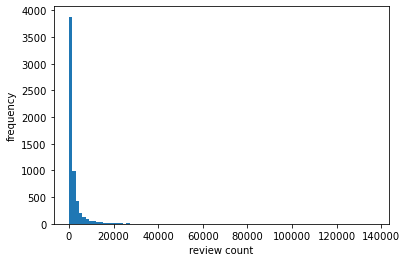

In [73]:
#Write a function that accepts a genre url and returns the genre name based on your experimentation above
    ####### 
    #   Insert your code
    ####### 
import matplotlib.pyplot as plt
%matplotlib inline
x = df.review_count
plt.hist(x, bins = 90)
plt.xlabel("review count")
plt.ylabel("frequency")
plt.show()

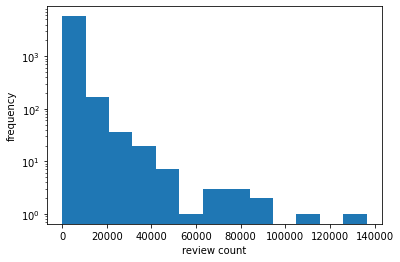

In [74]:
x = df.review_count
plt.hist(x, bins = 13, log = True)
plt.xlabel("review count")
plt.ylabel("frequency")
plt.show()

---


## Part 4:  Determining the Best Books 

This is an example of an analysis of the "grouped property" type.

Think of some reasonable definitions of what it could mean to be a "best book."
 

---

For example, we can determine the "best book" by year! Determine the best books in each year from 2000

In [75]:
#Deterime best book each year based on rating. 
for key, value in df.groupby('year', sort = True):
  yeardf = value[value.rating_count == value.rating_count.max()]
  print(yeardf, yeardf)
  break




      rating  review_count        isbn             book  \
1398     3.6          1644  0141026286  good_reads:book   

                                             author_url  year  \
1398  https://www.goodreads.com/author/show/5158478.... -1500   

                                             genre_urls  \
1398  /genres/religion|/genres/literature|/genres/an...   

                                         dir rating_count  \
1398  dir14/19351.The_Epic_of_Gilgamesh.html        42026   

                       name     author  
1398  The Epic of Gilgamesh  Anonymous         rating  review_count        isbn             book  \
1398     3.6          1644  0141026286  good_reads:book   

                                             author_url  year  \
1398  https://www.goodreads.com/author/show/5158478.... -1500   

                                             genre_urls  \
1398  /genres/religion|/genres/literature|/genres/an...   

                                         dir rating_count

In [76]:
#Deterime best book each year based on rating.
#yeardf = df['year']>=2000
yeardf = df.groupby('year', sort= True)

In [77]:
bestbook = yeardf.get_group(2004)
bestbookdf = value[value.rating_count == value.rating_count.max()]
print(bestbookdf.name, bestbookdf.rating_count)

1398    The Epic of Gilgamesh
Name: name, dtype: object 1398    42026
Name: rating_count, dtype: object


In [79]:
yeardf = df.groupby('year', sort = True)
print(yeardf)

In [80]:
 yeardf.size()
yeardf.first()

rating  review_count        isbn             book  \
year                                                       
-1500    3.60          1644  0141026286  good_reads:book   
-800     3.68          5785  0143039954  good_reads:book   
-560     4.03           890  0192840509  good_reads:book   
-512     3.92          3559  1590302257  good_reads:book   
-500     4.06          1087  0140449183  good_reads:book   
...       ...           ...         ...              ...   
 2010    4.39          6212  1595142509  good_reads:book   
 2011    4.34         82098  0062024035  good_reads:book   
 2012    4.43        112279  0525478817  good_reads:book   
 2013    4.58         15195  1406321346  good_reads:book   
 2014    4.85            26  1491732954  good_reads:book   

                                              author_url  \
year                                                       
-1500  https://www.goodreads.com/author/show/5158478....   
-800     https://www.goodreads.com/author/show/903.Homer   
-560   https://www.goodreads.com/author/show/12452.Aesop   
-512   https://www.goodreads.com/author/show/1771.Sun...   
-500   https://www.goodreads.com/author/show/5158478....   
...                                                  ...   
 2010  https://www.goodreads.com/author/show/137902.R...   
 2011  https://www.goodreads.com/author/show/4039811....   
 2012  https://www.goodreads.com/author/show/1406384....   
 2013  https://www.goodreads.com/author/show/150038.C...   
 2014  https://www.goodreads.com/author/show/8189303....   

                                              genre_urls  \
year                                                       
-1500  /genres/religion|/genres/literature|/genres/an...   
-800   /genres/classics|/genres/fiction|/genres/poetr...   
-560   /genres/classics|/genres/childrens|/genres/lit...   
-512   /genres/non-fiction|/genres/politics|/genres/c...   
-500   /genres/classics|/genres/spirituality|/genres/...   
...                                                  ...   
 2010  /genres/fantasy|/genres/paranormal|/genres/par...   
 2011  /genres/young-adult|/genres/science-fiction|/g...   
 2012  /genres/young-adult|/genres/book-club|/genres/...   
 2013  /genres/fantasy|/genres/young-adult|/genres/fa...   
 2014                                    /genres/fiction   

                                              dir rating_count  \
year                                                             
-1500      dir14/19351.The_Epic_of_Gilgamesh.html        42026   
-800                  dir01/1381.The_Odyssey.html       560248   
-560              dir14/21348.Aesop_s_Fables.html        71259   
-512              dir07/10534.The_Art_of_War.html       114619   
-500           dir08/99944.The_Bhagavad_Gita.html        31634   
...                                           ...          ...   
 2010             dir02/6479259-spirit-bound.html       180067   
 2011               dir01/13335037-divergent.html      1127983   
 2012  dir01/11870085-the-fault-in-our-stars.html      1150626   
 2013      dir03/18335634-clockwork-princess.html       130161   
 2014      dir10/22242097-honor-and-polygamy.html           97   

                                                name           author  
year                                                                   
-1500                          The Epic of Gilgamesh        Anonymous  
-800                                     The Odyssey            Homer  
-560                                  Aesop's Fables            Aesop  
-512                                  The Art of War          Sun_Tzu  
-500                               The Bhagavad Gita        Anonymous  
...                                              ...              ...  
 2010             Spirit Bound (Vampire Academy, #5)    Richelle_Mead  
 2011                      Divergent (Divergent, #1)    Veronica_Roth  
 2012                         The Fault in Our Stars       John_Green  
 2013  Clockw

In [81]:
yeardf.groups

{-1500: [1398], -800: [47, 246], -560: [1397], -512: [674], -500: [746], -458: [1815], -442: [777], -440: [2527], -431: [1428], -429: [629], -411: [2078, 3757], -400: [1233, 1882, 3133], -390: [4475], -380: [455], -370: [4402], -360: [5367], -350: [3274], -29: [596], 4: [4717], 8: [1330], 13: [1752], 100: [2329], 121: [4843], 130: [1860], 158: [4534], 174: [1169], 200: [1622], 201: [5404], 213: [2564], 397: [1393], 632: [301], 800: [327], 900: [569], 968: [4953], 1002: [2567], 1008: [852], 1010: [5439], 1100: [1653], 1106: [5798], 1140: [5831], 1200: [4691], 1215: [3311], 1220: [4054], 1300: [2863], 1314: [363], 1321: [132, 5354], 1348: [913], 1386: [1878, 4422], 1390: [167, 3272], 1391: [5542], 1485: [1613], 1516: [1692], 1522: [2266, 3894], 1532: [384, 3753], 1572: [2177, 4637], 1589: [5705], 1590: [774], 1592: [3954], 1595: [161], 1597: [14, 1204], 1599: [495, 539, 1144], 1600: [531, 2687], 1601: [489], 1602: [3097], 1603: [245, 5361], 1604: [2384], 1605: [82, 248], 1606: [2454], 16

In [82]:
 ydf = yeardf.get_group(2013)
ydf.max()

rating                                                       4.93
review_count                                                47308
book                                              good_reads:book
author_url      https://www.goodreads.com/author/show/88506.Jo...
year                                                         2013
dir                        dir60/17899696-the-edge-of-always.html
rating_count                                                99925
name                                    ÙØ§Ø¯Ù Ø§ÙØ³ÙØ§Ø±Ø§Øª
author                                                          _
dtype: object

In [85]:
yeardf['rating'].mean()

year
-1500    3.600000
-800     3.845000
-560     4.030000
-512     3.920000
-500     4.060000
           ...   
 2010    4.046341
 2011    4.067166
 2012    4.154169
 2013    4.200978
 2014    4.349655
Name: rating, Length: 293, dtype: float64

In [86]:
yeardf[['rating','rating_count']].max()

rating rating_count
year                      
-1500    3.60        42026
-800     4.01       560248
-560     4.03        71259
-512     3.92       114619
-500     4.06        31634
...       ...          ...
 2010    4.93          996
 2011    5.00         9980
 2012    5.00        99108
 2013    4.93        99925
 2014    5.00           97

[293 rows x 2 columns]

In [87]:
yeardf.agg({"rating":"mean","rating_count":"max"})

rating rating_count
year                        
-1500  3.600000        42026
-800   3.845000       560248
-560   4.030000        71259
-512   3.920000       114619
-500   4.060000        31634
...         ...          ...
 2010  4.046341          996
 2011  4.067166         9980
 2012  4.154169        99108
 2013  4.200978        99925
 2014  4.349655           97

[293 rows x 2 columns]

In [88]:
yeardf.agg(['mean','median','max'])

rating              review_count                
           mean median   max         mean  median     max
year                                                     
-1500  3.600000  3.600  3.60  1644.000000  1644.0    1644
-800   3.845000  3.845  4.01  3075.000000  3075.0    5785
-560   4.030000  4.030  4.03   890.000000   890.0     890
-512   3.920000  3.920  3.92  3559.000000  3559.0    3559
-500   4.060000  4.060  4.06  1087.000000  1087.0    1087
...         ...    ...   ...          ...     ...     ...
 2010  4.046341  4.030  4.93  2695.466877  1205.0   83643
 2011  4.067166  4.085  5.00  3165.788770  1347.5   82098
 2012  4.154169  4.160  5.00  3374.735211  1423.0  112279
 2013  4.200978  4.230  4.93  2477.271739  1346.5   47308
 2014  4.349655  4.370  5.00  1532.436782   273.0   11011

[293 rows x 6 columns]

Try this for few other definitions of the "best book" using `.groupby`.

## Part 5:  Trends in Popularity of Genres 

This is an example of an analysis of the "grouped property" type.

There are a lot of questions you could ask about genres.
* Which genre is currently the most popular?
* Better, based on our data, what draw conclusions can you draw about the time evolution of the popularity of each genre?


---

First we need to find the distinct genres in the dataframe. 

To do this, notice that each string is a pipe (|) separated list of genres. For each string, we ask if the genre is in that pipe separated list.  If it is, we return True, else False

**Hint: remember that python sets have unique (non-repeating) items.**

What happens if we add a column to the dataframe for each genre? 

Is this way of representing genre efficient? Allows for easy computation and visualization?

Are there other ways to represent genre information in the dataframe that allow for each visualization?

In [89]:
#Explore different ways to visualize information about the genres in the dataframe
####### 
#   Insert your code
####### 

newdf = df.dropna(subset=['genre_urls'])
newdf.shape


(5934, 11)

In [90]:
firstgenre = newdf['genre_urls'][0]
print(firstgenre)

/genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action


In [91]:
genresdf = firstgenre.split("/genres/")[1:]

In [92]:
 genres = [ genresdf.replace("|","")for genresdf in genresdf]
genres

['young-adult',
 'science-fiction',
 'dystopia',
 'fantasy',
 'science-fiction',
 'romance',
 'adventure',
 'book-club',
 'young-adult',
 'teen',
 'apocalyptic',
 'post-apocalyptic',
 'action']

In [93]:
#plot the data here
genres="".join(genresdf)
genres

'young-adult|science-fiction|dystopia|fantasy|science-fiction|romance|adventure|book-club|young-adult|teen|apocalyptic|post-apocalyptic|action'

In [94]:
def get_genre(url):
  genres = url.split("/genres/")[1:]
  genres="".join(genres)
  return genres

In [95]:
newdf['genre']= newdf.genre_urls.map(get_genre)
newdf.head()

<ipython-input-95-846f6602b29a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['genre']= newdf.genre_urls.map(get_genre)


rating  review_count        isbn             book  \
0    4.40        136455  0439023483  good_reads:book   
1    4.41         16648  0439358078  good_reads:book   
2    3.56         85746  0316015849  good_reads:book   
3    4.23         47906  0061120081  good_reads:book   
4    4.23         34772  0679783261  good_reads:book   

                                          author_url  year  \
0  https://www.goodreads.com/author/show/153394.S...  2008   
1  https://www.goodreads.com/author/show/1077326....  2003   
2  https://www.goodreads.com/author/show/941441.S...  2005   
3  https://www.goodreads.com/author/show/1825.Har...  1960   
4  https://www.goodreads.com/author/show/1265.Jan...  1813   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir rating_count  \
0                dir01/2767052-the-hunger-games.html      2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...      1284478   
2                          dir01/41865.Twilight.html      2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html      2078123   
4                dir01/1885.Pride_and_Prejudice.html      1388992   

                                                name           author  \
0            The Hunger Games (The Hunger Games, #1)  Suzanne_Collins   
1  Harry Potter and the Order of the Phoenix (Har...      J_K_Rowling   
2                            Twilight (Twilight, #1)  Stephenie_Meyer   
3                              To Kill a Mockingbird       Harper_Lee   
4                                Pride and Prejudice      Jane_Austen   

                                               genre  
0  young-adult|science-fiction|dystopia|fantasy|s...  
1  fantasy|young-adult|fiction|fantasy|magic|chil...  
2  young-adult|fantasy|romance|paranormal|vampire...  
3  classics|fiction|historical-fiction|academic|s...  
4  classics|fiction|romance|historical-fiction|li...

In [96]:
set_genre = set()

In [98]:
for genres in newdf.genre:
  set_genre.update(genres.split("|"))
print(len(set_genre))

537


In [99]:
for genre in set_genre:
  newdf[genre] = [genre in row.split("|") for row in newdf.genre]

<ipython-input-99-250f76a88e09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf[genre] = [genre in row.split("|") for row in newdf.genre]


In [100]:
 genredf = newdf[list(set_genre)]
genredf.head()

iran  sexuality  fiction  m-f-m  history  young-adult-contemporary  \
0  False      False    False  False    False                     False   
1  False      False     True  False    False                     False   
2  False      False     True  False    False                     False   
3  False      False     True  False    False                     False   
4  False      False     True  False    False                     False   

   bande-dessin%C3%A9e  social  young-adult-romance  angels  ...  logic  \
0                False   False                False   False  ...  False   
1                False   False                False   False  ...  False   
2                False   False                False   False  ...  False   
3                False   False                False   False  ...  False   
4                False   False                False   False  ...  False   

   young-adult-paranormal  us-presidents  african-american-literature  \
0                   False          False                        False   
1                   False          False                        False   
2                   False          False                        False   
3                   False          False                        False   
4                   False          False                        False   

   polish-literature  chapter-books  taoism  time-travel  education  \
0              False          False   False        False      False   
1              False          False   False        False      False   
2              False          False   False        False      False   
3              False          False   False        False      False   
4              False          False   False        False      False   

   gothic-horror  
0          False  
1          False  
2          False  
3          False  
4          False  

[5 rows x 537 columns]

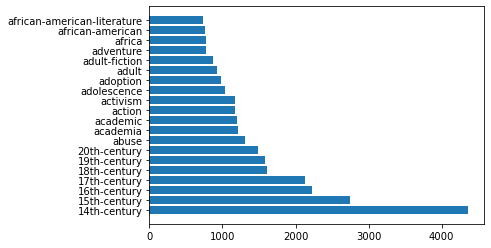

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

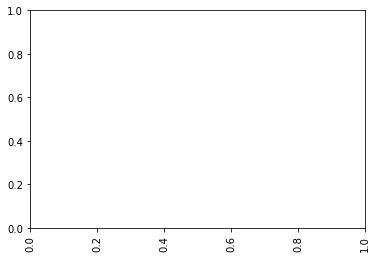

In [101]:
result = genredf.sum()
result = result.sort_values(ascending = False)
x = sorted(set_genre)[:20]
y = result[:20]

plt.barh(x,y)
plt.show()
plt.xticks(rotation = 90)